In [1]:
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from functools import reduce

%matplotlib inline

In [2]:
price = pd.read_csv('../data/fuel_prices_prepped.csv', skiprows = 2)
#source: US Dept. of Energy/Energy Information Administration - https://www.eia.gov/outlooks/steo/tables/pdf/2tab.pdf


In [3]:
price

,Fuel type,20Q1,20Q2,20Q3,20Q4,21Q1,21Q2,21Q3,21Q4,22Q1,22Q2,22Q3,22Q4,20YEAR,21YEAR,22YEAR
0,Crude Oil (dollars per barrel),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,West Texas Intermediate Spot Average ............,45.34,27.96,40.89,42.50,58.09,66.19,70.61,75.96,69.66,67.15,66.01,62.98,39.17,67.87,66.42
2,Brent Spot Average ..............................,49.97,29.52,42.97,44.34,61.12,68.91,73.45,78.27,73.00,70.65,69.67,66.98,41.69,70.60,70.05
3,U.S. Imported Average ...........................,43.75,26.24,39.87,40.69,55.27,64.80,68.46,73.48,67.44,64.90,63.54,60.46,37.22,66.18,64.03
4,U.S. Refiner Average Acquisition Cost ...........,47.48,26.76,40.79,42.09,57.12,66.11,70.12,74.96,68.43,65.91,64.53,61.47,39.73,67.44,65.02
5,U.S. Liquid Fuels (cents per gallon),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Refiner Prices for Resale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Gasoline ........................................,153.00,104.00,137.00,133.00,180.00,216.00,232.00,239.00,213.00,213.00,209.00,191.00,133.00,218.00,206.00
8,Diesel Fuel .....................................,160.00,97.00,124.00,133.00,178.00,204.00,219.00,242.00,217.00,212.00,211.00,205.00,129.00,212.00,211.00
9,Fuel Oil ........................................,160.00,87.00,113.00,121.00,162.00,180.00,197.00,218.00,206.00,193.00,188.00,191.00,125.00,197.00,196.00


In [4]:
#trying to clean up the fuel type names

price['Fuel type'] = price['Fuel type'].replace(' ','')

In [5]:
price.head()

,Fuel type,20Q1,20Q2,20Q3,20Q4,21Q1,21Q2,21Q3,21Q4,22Q1,22Q2,22Q3,22Q4,20YEAR,21YEAR,22YEAR
0,Crude Oil (dollars per barrel),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,West Texas Intermediate Spot Average ............,45.34,27.96,40.89,42.50,58.09,66.19,70.61,75.96,69.66,67.15,66.01,62.98,39.17,67.87,66.42
2,Brent Spot Average ..............................,49.97,29.52,42.97,44.34,61.12,68.91,73.45,78.27,73.00,70.65,69.67,66.98,41.69,70.60,70.05
3,U.S. Imported Average ...........................,43.75,26.24,39.87,40.69,55.27,64.80,68.46,73.48,67.44,64.90,63.54,60.46,37.22,66.18,64.03
4,U.S. Refiner Average Acquisition Cost ...........,47.48,26.76,40.79,42.09,57.12,66.11,70.12,74.96,68.43,65.91,64.53,61.47,39.73,67.44,65.02


In [6]:
price['Fuel type'].value_counts()

Industrial Sector ...............................................................         2
Residential Sector ............................................................           2
Commercial Sector ...........................................................             2
Refiner Prices to End Users                                                               1
Distillate Fuel Oil ..............................................................        1
Henry Hub Spot (dollars per thousand cubic feet) ................                         1
Residual Fuel Oil (c) .........................................................           1
Power Generation Fuel Costs (dollars per million Btu)                                     1
U.S. Liquid Fuels (cents per gallon)                                                      1
Natural Gas  .....................................................................        1
Natural Gas                                                                     

So, there's lots of "..."s of varying lengths.  tried just replacing "." with "" but that didn't work

Since there's just 3 kinds of fuel i'm interested in, seems more expedient to separate those three out and rename them via copy/paste/rename, rather than trying to work out a way of cleaning the entire dataset with its variety of "..." lenghts

would probably be a regex thing ... 

In [7]:
price_relevant = price[price['Fuel type'].isin([
    'On-highway Diesel Fuel ...................................................',
    'Jet Fuel ............................................................................',
    'No. 6 Residual Fuel Oil (a) ...............................................'])]

In [8]:
price_relevant['Fuel type'] = price_relevant['Fuel type'].replace({
    'On-highway Diesel Fuel ...................................................': 'Diesel',
    'Jet Fuel ............................................................................':'Jet Fuel',
    'No. 6 Residual Fuel Oil (a) ...............................................':'Heavy Fuel Oil'})

<ipython-input-8-720b2b69c8ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_relevant['Fuel type'] = price_relevant['Fuel type'].replace({


In [9]:
price_relevant

,Fuel type,20Q1,20Q2,20Q3,20Q4,21Q1,21Q2,21Q3,21Q4,22Q1,22Q2,22Q3,22Q4,20YEAR,21YEAR,22YEAR
11,Jet Fuel,165.0,85.0,116.0,125.0,163.0,182.0,199.0,232.0,213.0,210.0,208.0,203.0,131.0,197.0,208.0
12,Heavy Fuel Oil,177.0,93.0,116.0,119.0,162.0,181.0,194.0,184.0,163.0,160.0,154.0,148.0,126.0,181.0,156.0
16,Diesel,289.0,243.0,243.0,247.0,290.0,321.0,336.0,362.0,329.0,316.0,317.0,313.0,256.0,328.0,319.0


In [10]:
price_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 11 to 16
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fuel type  3 non-null      object 
 1   20Q1       3 non-null      float64
 2   20Q2       3 non-null      float64
 3   20Q3       3 non-null      float64
 4   20Q4       3 non-null      float64
 5   21Q1       3 non-null      float64
 6   21Q2       3 non-null      float64
 7   21Q3       3 non-null      float64
 8   21Q4       3 non-null      float64
 9   22Q1       3 non-null      float64
 10  22Q2       3 non-null      float64
 11  22Q3       3 non-null      float64
 12  22Q4       3 non-null      float64
 13  20YEAR     3 non-null      float64
 14  21YEAR     3 non-null      float64
 15  22YEAR     3 non-null      float64
dtypes: float64(15), object(1)
memory usage: 408.0+ bytes


In [11]:
#dropping first column so i can do math on all remaining columns
price_relevant= price_relevant.drop('Fuel type', 1)

In [12]:
#converting all columns to dollar amounts - x.01 = price per gallon
price_relevant = price_relevant.mul([.01,.01,.01], axis=0)

In [13]:
#returning first column to df
price_relevant.insert(0,'Fuel type',['Jet Fuel','Heavy Fuel Oil', 'Diesel'], True)

In [14]:
price_relevant

,Fuel type,20Q1,20Q2,20Q3,20Q4,21Q1,21Q2,21Q3,21Q4,22Q1,22Q2,22Q3,22Q4,20YEAR,21YEAR,22YEAR
11,Jet Fuel,1.65,0.85,1.16,1.25,1.63,1.82,1.99,2.32,2.13,2.10,2.08,2.03,1.31,1.97,2.08
12,Heavy Fuel Oil,1.77,0.93,1.16,1.19,1.62,1.81,1.94,1.84,1.63,1.60,1.54,1.48,1.26,1.81,1.56
16,Diesel,2.89,2.43,2.43,2.47,2.90,3.21,3.36,3.62,3.29,3.16,3.17,3.13,2.56,3.28,3.19


In [15]:
price_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 11 to 16
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fuel type  3 non-null      object 
 1   20Q1       3 non-null      float64
 2   20Q2       3 non-null      float64
 3   20Q3       3 non-null      float64
 4   20Q4       3 non-null      float64
 5   21Q1       3 non-null      float64
 6   21Q2       3 non-null      float64
 7   21Q3       3 non-null      float64
 8   21Q4       3 non-null      float64
 9   22Q1       3 non-null      float64
 10  22Q2       3 non-null      float64
 11  22Q3       3 non-null      float64
 12  22Q4       3 non-null      float64
 13  20YEAR     3 non-null      float64
 14  21YEAR     3 non-null      float64
 15  22YEAR     3 non-null      float64
dtypes: float64(15), object(1)
memory usage: 408.0+ bytes


In [16]:
price_viz1 = price_relevant.drop(['20YEAR','21YEAR','22YEAR'], axis=1)

In [17]:
price_viz2 = price_relevant[['Fuel type','20YEAR','21YEAR','22YEAR']]

In [18]:
#setting the size of my visuals
sns.set(rc={"figure.figsize":(13, 8)},font_scale=1.5, style='darkgrid')

In [55]:
#to show the values of the data on my graph:

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

I need to restructure my df to make it plot-able

In [21]:
price_viz1

,Fuel type,20Q1,20Q2,20Q3,20Q4,21Q1,21Q2,21Q3,21Q4,22Q1,22Q2,22Q3,22Q4
11,Jet Fuel,1.65,0.85,1.16,1.25,1.63,1.82,1.99,2.32,2.13,2.10,2.08,2.03
12,Heavy Fuel Oil,1.77,0.93,1.16,1.19,1.62,1.81,1.94,1.84,1.63,1.60,1.54,1.48
16,Diesel,2.89,2.43,2.43,2.47,2.90,3.21,3.36,3.62,3.29,3.16,3.17,3.13


In [32]:
#renaming for visual clarity

price_viz1 = price_viz1.rename(columns={
    '20Q1':'2020 Q1', '20Q2':'2020 Q2', '20Q3':'2020 Q3', '20Q4':'2020 Q4',
    '21Q1':'2021 Q1', '21Q2':'2021 Q2', '21Q3':'2021 Q3', '21Q4':'2021 Q4',
    '22Q1':'2022 Q1', '22Q2':'2022 Q2', '22Q3':'2022 Q3', '22Q4':'2022 Q4'
})

In [33]:
price_viz1.T

,11,12,16
Fuel type,Jet Fuel,Heavy Fuel Oil,Diesel
2020 Q1,1.65,1.77,2.89
2020 Q2,0.85,0.93,2.43
2020 Q3,1.16,1.16,2.43
2020 Q4,1.25,1.19,2.47
2021 Q1,1.63,1.62,2.9
2021 Q2,1.82,1.81,3.21
2021 Q3,1.99,1.94,3.36
2021 Q4,2.32,1.84,3.62
2022 Q1,2.13,1.63,3.29


In [36]:
price_viz1=pd.melt(price_viz1, id_vars=['Fuel type'], value_vars=['2020 Q1', '2020 Q2', '2020 Q3', '2020 Q4', 
                                                       '2021 Q1', '2021 Q2', '2021 Q3', '2021 Q4', 
                                                       '2022 Q1', '2022 Q2', '2022 Q3', '2022 Q4'])

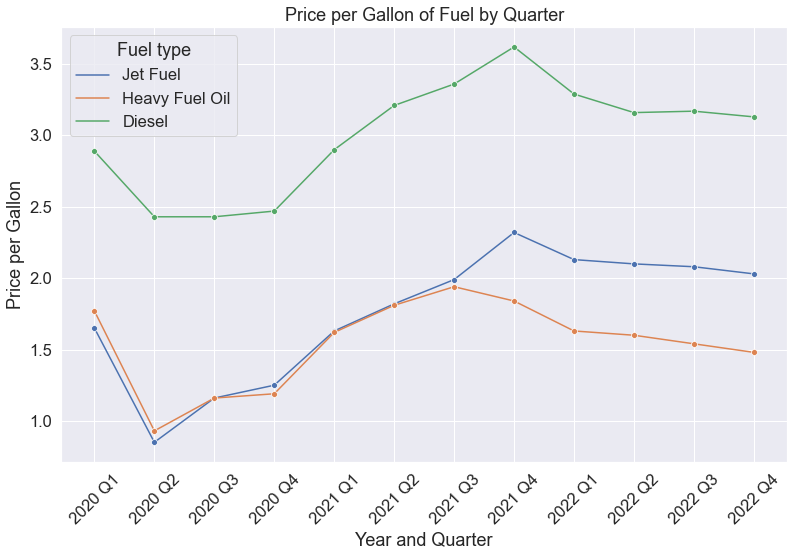

In [48]:
fig, ax = plt.subplots(figsize=(13,8))

a = sns.lineplot(data = price_viz1, x = 'variable', y = 'value', hue = 'Fuel type', marker="o")
#a.set_xticklabels(a.get_xticklabels(),rotation=30)
plt.xticks(rotation=45)
a.set(xlabel = 'Year and Quarter', ylabel = 'Price per Gallon')
a.set_title('Price per Gallon of Fuel by Quarter')



I need to restructure my df into something plottable - no xy axis available as it currently exists

In [22]:
price_viz2

,Fuel type,20YEAR,21YEAR,22YEAR
11,Jet Fuel,1.31,1.97,2.08
12,Heavy Fuel Oil,1.26,1.81,1.56
16,Diesel,2.56,3.28,3.19


In [23]:
price_viz2 = price_viz2.rename(columns = {'20YEAR':'2020', '21YEAR':'2021', '22YEAR':'2022'})

In [24]:
price_viz2.T

,11,12,16
Fuel type,Jet Fuel,Heavy Fuel Oil,Diesel
2020,1.31,1.26,2.56
2021,1.97,1.81,3.28
2022,2.08,1.56,3.19


In [25]:
price_viz2=pd.melt(price_viz2, id_vars=['Fuel type'], value_vars=['2020', '2021', '2022'])

In [26]:
price_viz2

,Fuel type,variable,value
0,Jet Fuel,2020,1.31
1,Heavy Fuel Oil,2020,1.26
2,Diesel,2020,2.56
3,Jet Fuel,2021,1.97
4,Heavy Fuel Oil,2021,1.81
5,Diesel,2021,3.28
6,Jet Fuel,2022,2.08
7,Heavy Fuel Oil,2022,1.56
8,Diesel,2022,3.19


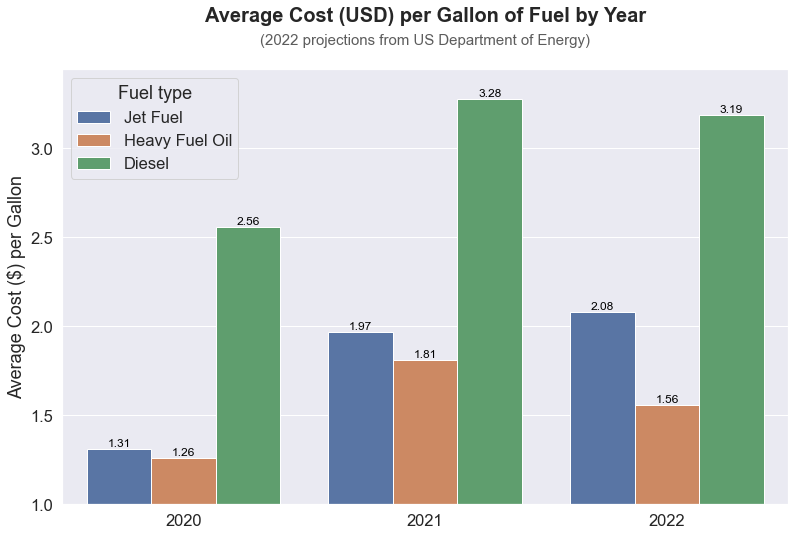

In [70]:
fig, ax = plt.subplots(figsize=(13,8))

b=sns.barplot(data=price_viz2, x='variable', y='value', hue='Fuel type')
b.set(xlabel = '', ylabel = 'Average Cost ($) per Gallon')
#b.set_title('Average Cost (USD) per Gallon of Fuel by Year')
b.text(x=0.5, y=1.1, s='Average Cost (USD) per Gallon of Fuel by Year', fontsize=20, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
b.text(x=0.5, y=1.05, s='(2022 projections from US Department of Energy)', fontsize=15, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)


ax = plt.gca()
y_max = price_viz2['value'].value_counts().max() 
ax.set_ylim(1)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
        fontsize=12, color='black', ha='center', va='bottom')

#show_values(b)